# Credit Card Approval

### Introduction

A credit card is a type of loan where the money you spend is borrowed from the card provider rather than taken from your bank account.Credit card providers will set a limit on the amount you can borrow and have fixed rules for paying off the debt – normally a minimum amount each month. 

To be accepted for a credit card, you’ll need to meet the lender’s eligibility criteria. These factors will be individual to each lender – but typically they will usually include:

    Age: You must be at least 18 years old. However, some banks have a minimum requirement of 21 years. The maximum age     requirement also differs, and it generally goes up to 60 years.
    
    Annual salary: Your annual income determines if you’re eligible for a particular card. The minimum salary required to apply for a credit card in India is around Rs.3 lakh p.a. Although, it’s best to check this criterion with your bank as this requirement differs depending on the card issuer you choose.
    
    Employment: Working with your current employer or organisation for more than a year will make you appear credible and significantly improve your chances of getting a credit card.
    
    Credit score: Your chances of getting a credit card increases when you have a stellar credit score. If you have a bad score, your application will most likely be rejected. A good credit score is anywhere from 750 to 900.

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. 


The aim is to build a machine learning model to predict if an applicantion is 'Accepted' or 'Rejected' based on historical data.

#### Data

Two files are available. One, the application data, and the second one monthly credit card status information.

#### Application Data

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

#### Features :

    Ind_ID: Client ID

    Gender  : Gender information

    Car_owner  : Having car or not

    Propert_owner  : Having property or not

    Children  : Count of children

    Annual_income  : Annual income

    Type_Income  : Income type

    Children  : Count of children

    Annual income  : Annual income

    Type Income  : Income type
 
    Education  : Education level

    Marital status  : Marital status

    Housing_type  : Living style

    Birthday_count  : Use backward count from current day (0), -1 means yesterday.

    Employed_days  : Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.
 
    Mobile phone  : Any mobile phone
 
    Work_phone  : Any work phone

    Phone  : Any phone number

    EMAIL ID  : Any email ID

    Type Occupation  : Occupation

    Family Members  : Family size

Another data set (Credit_card_label.csv) contains two key pieces of information.

    ID: The joining key between application data and credit status data, same is Ind_ID 
    
    Label: 0 is application approved and 1 is application rejected.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import datetime
from datetime import timedelta

### Data Loading

In [2]:
card_df=pd.read_csv('Credit_card.csv')
label_df=pd.read_csv('Credit_card_label.csv')

In [3]:
credit_df=card_df.copy()
Clabel_df=label_df.copy()

### Understanding Data 

In [4]:
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [5]:
credit_df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [7]:
credit_df.shape

(1548, 18)

In [8]:
credit_df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [9]:
credit_df.describe(include = 'all')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [10]:
credit_df['Ind_ID'].nunique()

1548

The total rows are 1,548. This means it has no duplicates

### Handling the missing values

An important question that gets raised here is why are we giving so much importance to missing values? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as LDA.

So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.

In [11]:
# Impute the missing values with mean imputation
credit_df.fillna(credit_df.mean(), inplace=True)

credit_df.isnull().sum()

C:\Users\91789\AppData\Local\Temp\ipykernel_4784\1753320794.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_df.fillna(credit_df.mean(), inplace=True)


Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 2 and 17. These columns contain non-numeric data and this why the mean imputation strategy would not work here.

In [12]:
credit_df.CHILDREN.unique()

array([ 0,  1,  2,  4,  3, 14], dtype=int64)

In [13]:
credit_df['Annual_income'] = credit_df['Annual_income'].round().astype(int)

In [14]:
credit_df.Annual_income.unique()

array([ 180000,  315000,  191399,  450000,   90000,  472500,  270000,
        126000,  202500,  157500,  112500,  540000,  292500,  135000,
         76500,  215100,  225000,   67500,  171000,  103500,   99000,
        391500,   65250,   72900,  360000,  256500,  675000,  247500,
         85500,  121500,  130500,  211500,   81000,   72000,  148500,
        162000,  195750,  585000,  216000,  306000,  108000,   63000,
         45000,  337500,  131400,  117000,  445500,  234000, 1575000,
        144000,   67050,   73350,  193500,  900000,   94500,  198000,
         54000,  166500,  167400,  153000,  423000,  243000,  283500,
        252000,  495000,  612000,   36000,  139500,  133650,  427500,
        261000,  231750,   90900,   45900,  119250,   58500,  328500,
        787500,  594000,  119700,   69372,   37800,  387000,  207000,
        189000,  333000,  105750,  382500,  141750,   40500,  405000,
         44550,  301500,  351000,  175500,  121900,  238500,   33750,
        116100,  297

In [15]:
credit_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,191399,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000,Working,Higher education,Married,House / apartment,-13174.000000,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645,1,1,1,0,Drivers,2


In [16]:
credit_df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income        int32
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
dtype: object

In [17]:
credit_df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.124080e+05,4199.321477,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19476.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.710000e+05,-15814.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12483.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [18]:
credit_df.Birthday_count.unique()

array([-18772.        , -13557.        , -16040.34207077, ...,
       -10229.        , -15292.        , -16601.        ])

In [19]:
credit_df.Employed_days.unique()

array([365243,   -586,   -678,  -1002,   -913,   -248,  -2470,  -1644,
        -4327,  -1674,  -1086,   -925,   -854,   -185,  -3350,   -691,
        -4770,  -2394,   -384,  -3647,  -1546,   -808,  -1285,   -855,
        -7369,  -2269,  -4114,  -1161,  -7288,   -166,   -866,   -564,
        -3366,  -2150,  -1458,  -8369,   -508,  -1567,   -137,  -3974,
        -1570,  -2878,   -140,  -2576,  -1905,  -1724,  -1328,  -4987,
        -3496,  -1394,  -1265,  -2531,  -2105,   -860,   -217,   -535,
        -6866,   -584,  -2227,  -8161,   -613,   -606,  -6944,   -346,
        -1808,  -3420,   -863,  -7413,  -7553,  -3931,  -1039,   -134,
         -622,  -1595,  -1626,  -1868,   -555,  -1935,   -931,   -900,
        -4305,   -499,  -2418,   -189,  -1132,  -1770,   -919,  -1081,
         -502,  -2420,  -1325,  -6367,  -2484,   -341,  -9422,  -3054,
        -2987,  -2128,   -820,   -141,  -1692,  -4686,   -693,   -567,
         -885,  -2769,  -1547,  -3179,  -5204,  -3072,   -320,  -2469,
      

In [20]:
credit_df.Mobile_phone.unique()

array([1], dtype=int64)

In [21]:
credit_df.Work_Phone.unique()

array([0, 1], dtype=int64)

In [22]:
credit_df.Phone.unique()

array([0, 1], dtype=int64)

In [23]:
credit_df.EMAIL_ID.unique()

array([0, 1], dtype=int64)

In [24]:
credit_df.Family_Members.unique()

array([ 2,  3,  1,  4,  6,  5, 15], dtype=int64)

In [25]:
## This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')
    return employed_date

In [26]:
credit_df['Birthday_count']=credit_df['Birthday_count'].apply(Date_of_Birth)

In [27]:
credit_df['Employed_days']=credit_df['Employed_days'].apply(Employed_day)

In [28]:
credit_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000,Pensioner,Higher education,Married,House / apartment,1971-10-17,3023-03-11,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,1986-01-26,2021-08-01,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,1979-04-09,2021-08-01,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,191399,Commercial associate,Higher education,Married,House / apartment,1986-01-26,2021-08-01,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,1986-01-26,2021-08-01,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399,Commercial associate,Higher education,Married,House / apartment,1990-06-14,2017-03-19,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000,Commercial associate,Incomplete higher,Single / not married,House / apartment,1995-03-08,2019-11-17,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000,Working,Higher education,Married,House / apartment,1987-02-13,2016-05-28,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000,Working,Secondary / secondary special,Civil marriage,House / apartment,1981-04-27,2021-06-03,1,1,1,0,Drivers,2


In [29]:
#let's create a function to calculate age
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

In [30]:
credit_df['Birthday_count']=credit_df['Birthday_count'].apply(AGE)

In [31]:
credit_df.rename(columns={'Birthday_count':'Age'},inplace=True)

In [32]:
credit_df['Employed_days']=credit_df['Employed_days'].apply(AGE)

In [33]:
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000,Pensioner,Higher education,Married,House / apartment,52,-1000,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,37,2,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,44,2,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,191399,Commercial associate,Higher education,Married,House / apartment,37,2,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,37,2,1,1,1,0,NaN,2


In [34]:
credit_df.describe()

,Ind_ID,CHILDREN,Annual_income,Age,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,44.211886,-162.270672,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.124080e+05,11.507410,377.423802,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,21.000000,-1000.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,34.000000,1.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.710000e+05,44.000000,5.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,54.000000,9.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,69.000000,41.000000,1.0,1.000000,1.000000,1.000000,15.000000


Mobile_phone consists same Min and Max values, so may not be of any use.

### Drop unwanted data

In [35]:
# column is not correlated to any feature so let's drop the that column.Min and Max values are same, so may not be of any use.
credit_df.drop( columns = ['Mobile_phone'],inplace=True)

### Data Visualisation


## Univariate analysis

#### Car_Owner

In [36]:
car_counts = credit_df['Car_Owner'].value_counts()
print(car_counts)

N    924
Y    624
Name: Car_Owner, dtype: int64


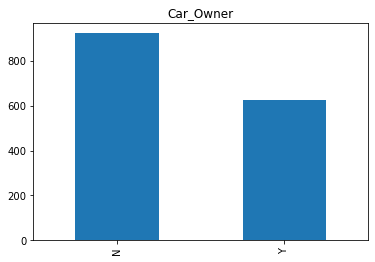

In [37]:
credit_df["Car_Owner"].value_counts().plot.bar()
plt.title("Car_Owner");

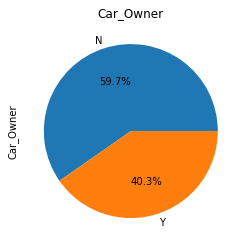

In [38]:
credit_df["Car_Owner"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Car_Owner");

Most applicants don't own a car

#### Property_Owner

In [39]:
property_counts = credit_df['Propert_Owner'].value_counts()
print(car_counts)

N    924
Y    624
Name: Car_Owner, dtype: int64


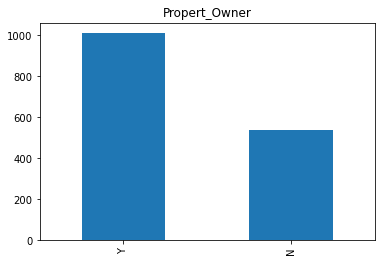

In [40]:
credit_df["Propert_Owner"].value_counts().plot.bar()
plt.title("Propert_Owner");

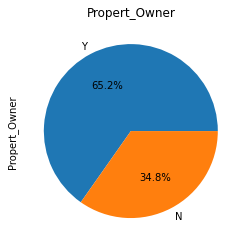

In [41]:
credit_df["Propert_Owner"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Propert_Owner");

Most applicants own a property

#### GENDER

In [42]:
gender_counts = credit_df['GENDER'].value_counts()
print(gender_counts)

F    973
M    568
Name: GENDER, dtype: int64


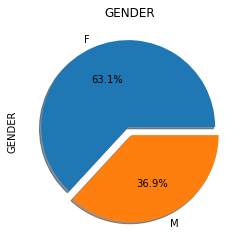

In [43]:
credit_df["GENDER"].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=True)
plt.title("GENDER");

There are more female applicants than male (63% vs 37%)

#### Age

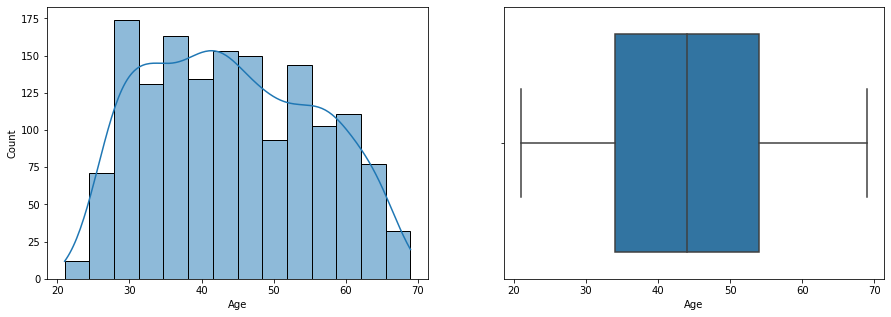

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(credit_df["Age"], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=credit_df["Age"])
plt.show()

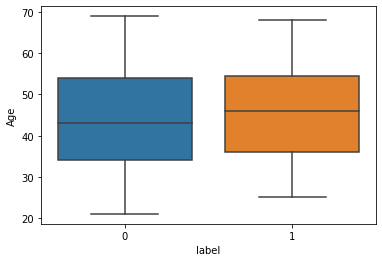

In [45]:
sns.boxplot(x=Clabel_df['label'], y=credit_df['Age'])
plt.show()

The youngest applicant is 21 years old while the oldest is 68 years old.

Age feature is not normally distributed, it is slightly positively skew.

#### Marital_status

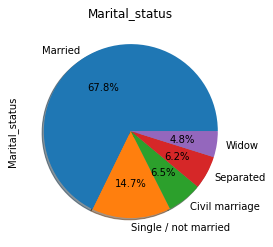

In [46]:
credit_df["Marital_status"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("Marital_status");

Most applicants are married.

#### Family_Members

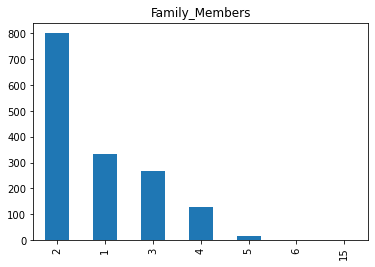

In [47]:
credit_df["Family_Members"].value_counts().plot.bar()
plt.title("Family_Members");

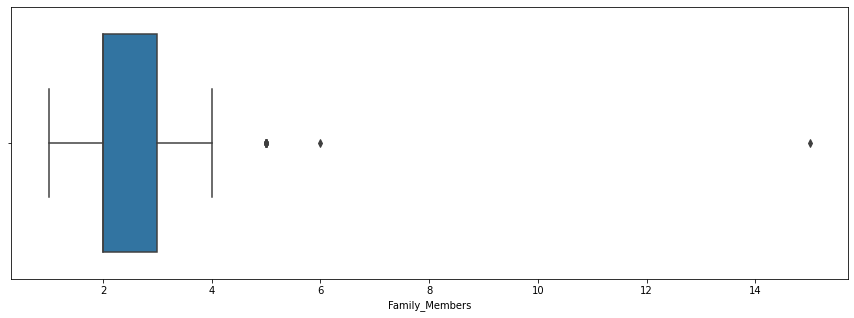

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(x=credit_df["Family_Members"])
plt.show()

Most applicants are two in their household, this is also confirmed with the fact that most don’t have a child (more on this in a bit)

#### CHILDREN

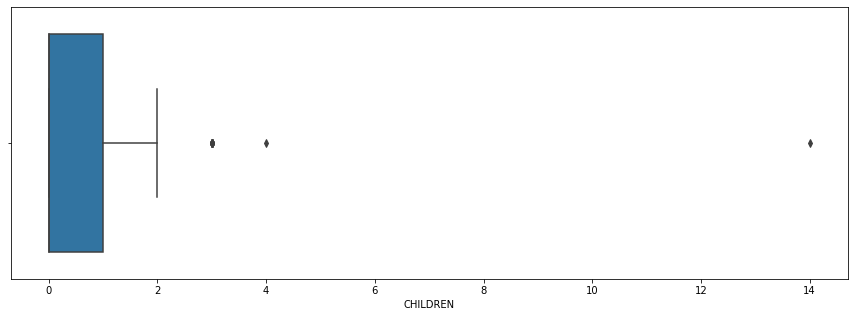

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(x=credit_df["CHILDREN"])
plt.show()

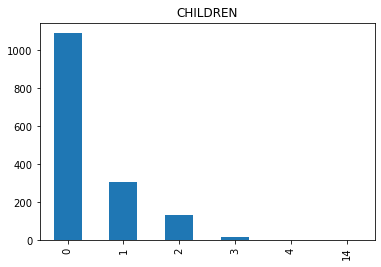

In [50]:
credit_df["CHILDREN"].value_counts().plot.bar()
plt.title("CHILDREN");

As previously discussed most applicant don’t have a child

#### Annual_income

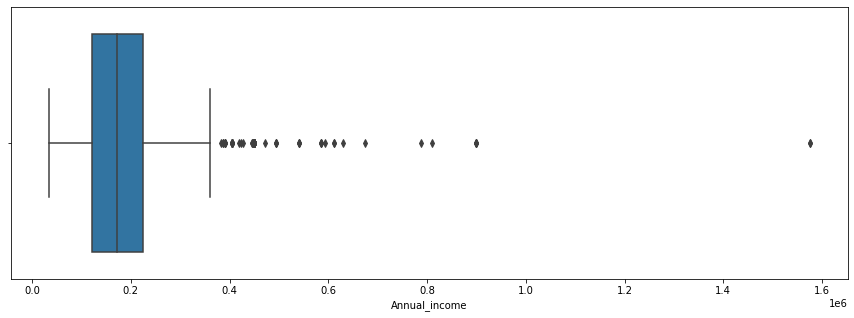

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(x=credit_df["Annual_income"])
plt.show()

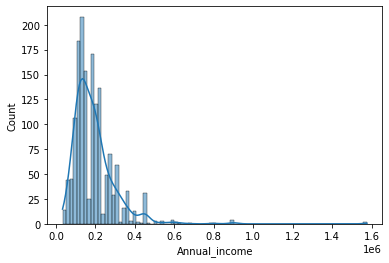

In [52]:
sns.histplot(credit_df["Annual_income"], kde=True)
plt.show()

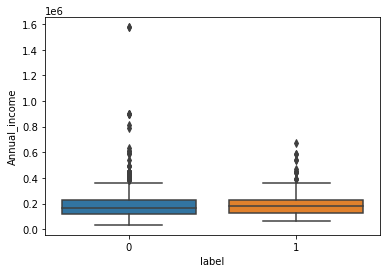

In [53]:
sns.boxplot(x=Clabel_df['label'], y=credit_df['Annual_income'])
plt.show()

In [54]:
credit_df['Annual_income'].describe().round()

count       1548.0
mean      191399.0
std       112408.0
min        33750.0
25%       121500.0
50%       171000.0
75%       225000.0
max      1575000.0
Name: Annual_income, dtype: float64

 Interpretation:   
 
    The average income is 191399
    We have 1 applicant who makes more than 1000000
    This feature is positively skewed

#### Type_Income

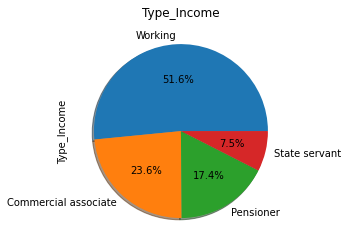

In [55]:
credit_df["Type_Income"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("Type_Income");

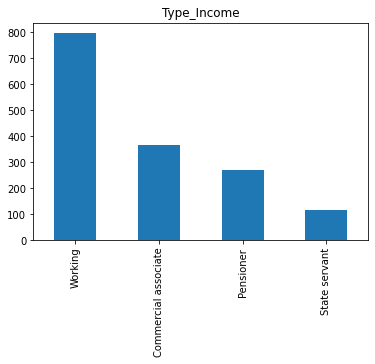

In [56]:
credit_df["Type_Income"].value_counts().plot.bar()
plt.title("Type_Income");

Most of the applicants are Employed.

#### EDUCATION

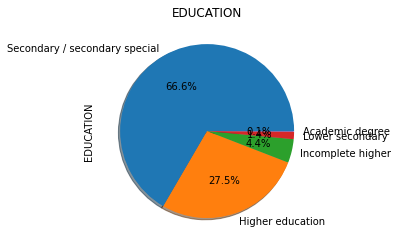

In [57]:
credit_df["EDUCATION"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("EDUCATION");

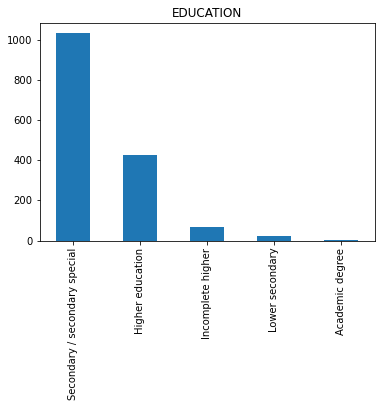

In [58]:
credit_df["EDUCATION"].value_counts().plot.bar()
plt.title("EDUCATION");

The majority of applicants have completed their secondary degree, ¼ completed their higher education

#### Housing_type

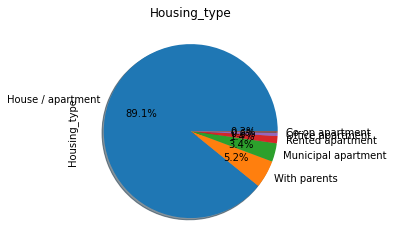

In [59]:
credit_df["Housing_type"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("Housing_type");

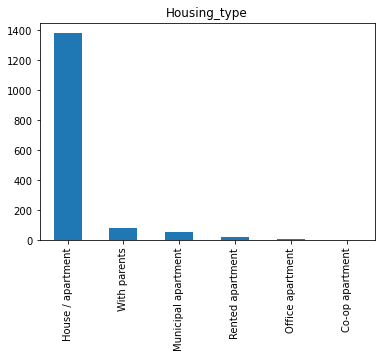

In [60]:
credit_df["Housing_type"].value_counts().plot.bar()
plt.title("Housing_type");

Most of the applicants live in House or apartment.

#### Employed_days

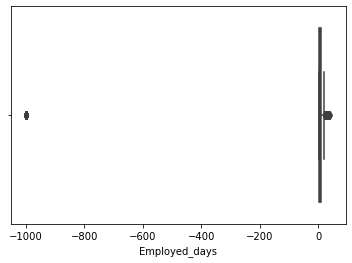

In [61]:
sns.boxplot(x=credit_df["Employed_days"])
plt.show()

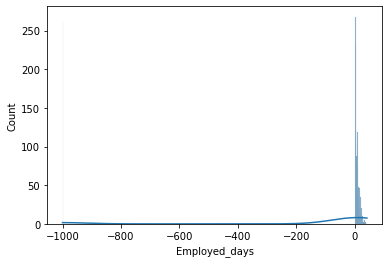

In [62]:
sns.histplot(credit_df["Employed_days"], kde=True)
plt.show()

We have outlier at -1000 which cannot be possible in real life.
Other than that it is positively skewed.

#### Work_Phone

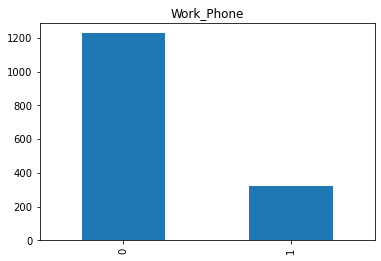

In [63]:
credit_df["Work_Phone"].value_counts().plot.bar()
plt.title("Work_Phone");

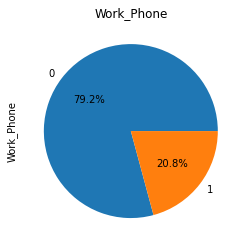

In [64]:
credit_df["Work_Phone"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Work_Phone");

More than 3/4th of the applicants don't have a work phone.

#### Phone

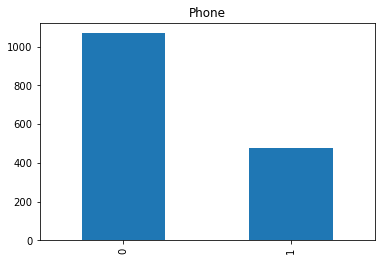

In [65]:
credit_df["Phone"].value_counts().plot.bar()
plt.title("Phone");

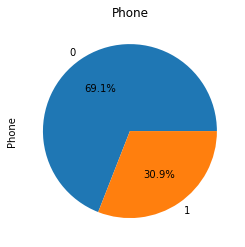

In [66]:
credit_df["Phone"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Phone");

Most applicants does not own a phone.

#### EMAIL_ID

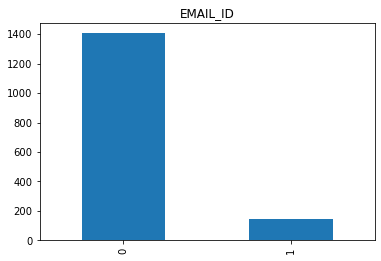

In [67]:
credit_df["EMAIL_ID"].value_counts().plot.bar()
plt.title("EMAIL_ID");

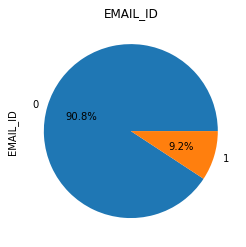

In [68]:
credit_df["EMAIL_ID"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("EMAIL_ID");

More than 90% of the applicants don't have an email

#### Type_Occupation

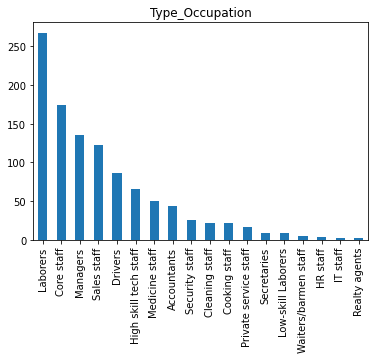

In [69]:
credit_df["Type_Occupation"].value_counts().plot.bar()
plt.title("Type_Occupation");

In [70]:
occupation_nan_count = credit_df['Type_Occupation'].isna().sum()
occupation_nan_count

488

In [71]:
rows_total_count = credit_df.shape[0]

In [72]:
print('The percentage of missing rows is {:.2f} %'.format(occupation_nan_count * 100 / rows_total_count))

The percentage of missing rows is 31.52 %


Interpretation:

       The laborers Job title has the highest count by far
       It has 31.52% of missing data

#### label

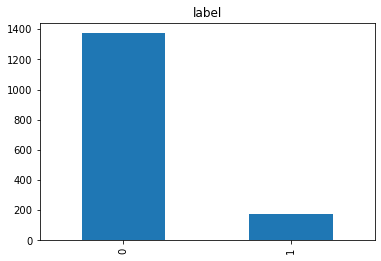

In [73]:
Clabel_df["label"].value_counts().plot.bar()
plt.title("label");

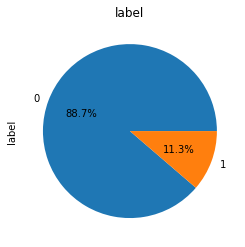

In [74]:
Clabel_df["label"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("label");

Most of the applications has been approved

In [75]:
credit_df.skew()

C:\Users\91789\AppData\Local\Temp\ipykernel_4784\3880169017.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_df.skew()


Ind_ID            0.072346
CHILDREN          4.631122
Annual_income     3.953991
Age               0.175220
Employed_days    -1.770971
Work_Phone        1.440179
Phone             0.825309
EMAIL_ID          2.818216
Family_Members    2.232273
dtype: float64

## Bivariate Analysis

### Numerical vs numerical features (Correlation & scatter plots)

#### Scatter plots

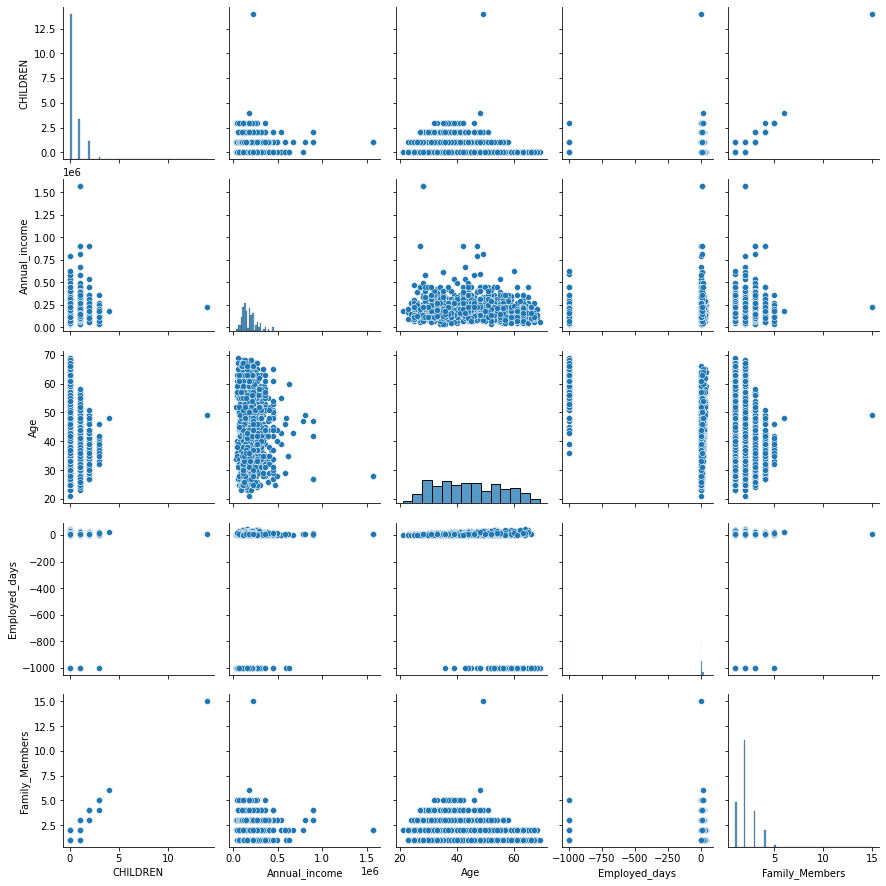

In [76]:
columns = ['CHILDREN','Annual_income', 'Age', 'Employed_days','Family_Members']

df_selected = credit_df[columns]

sns.pairplot(df_selected)
plt.show()

Interpretation:

We can see a positive linear correlation between the family member and the children count. This makes sense, the more the children someone have, the larger the family member count.This is a multicollinearity problem.Meaning that the features are highly correlated. We will need to drop one of them.

Another interesting trend is the Employment length and age. This also makes sense, the longer the employee has been working, the older they are.

#### Employed days vs age (numerical vs numerical)

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


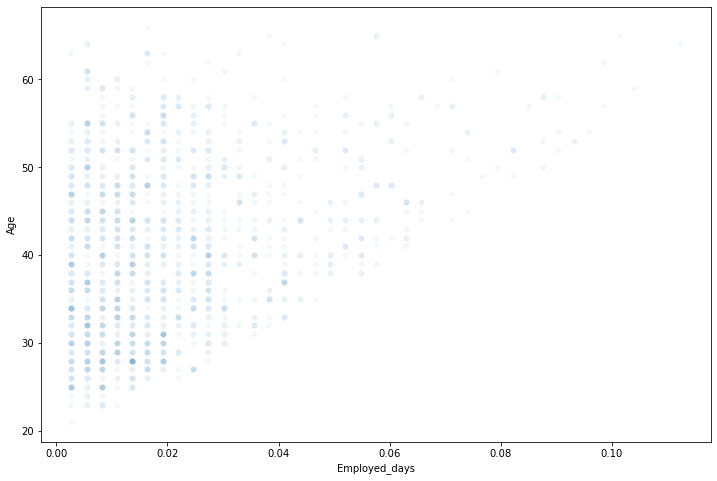

In [77]:
x_employ_length = np.abs(credit_df[credit_df['Employed_days'] > 0]['Employed_days'])/365.25
y_age=credit_df['Age']
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x_employ_length,y_age,alpha=.05)
# change the frequency of the x-axis and y-axis labels
# plt.xticks(np.arange(0, x_employ_length.max(), 2.5))
# plt.yticks(np.arange(20, y_age.max(), 5))
plt.show()

Interpretation:

This scatterplot shows that the age of the applicants is correlated with the length of the employment.

#### Correlation analysis

In [78]:
df = pd.merge(credit_df, Clabel_df, on="Ind_ID")

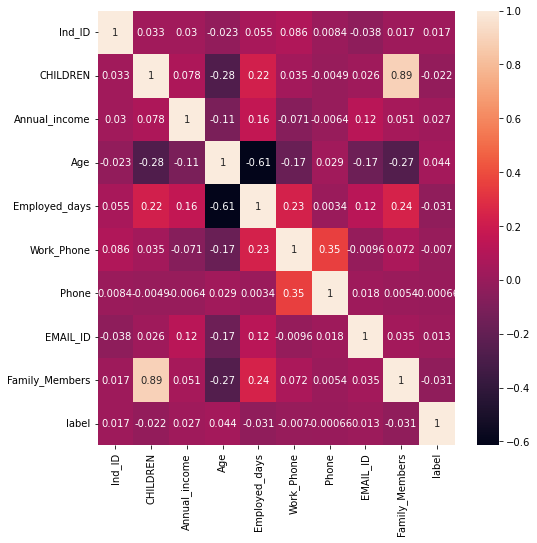

In [79]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Interpretation:

    There is no feature that is correlated with the target feature
   
    Family member count is highly correlated with children count as previously discussed. 
    
    Another positive correlation is having a phone and having a work phone.
    
    Age has some positive correlation with the family member count and children count. The older a person is, the greater the likelihood of having a larger family.
    
    We can see a negative correlation between the employment length and the age as previously seen

### Numerical vs categorical features (ANOVA)

#### Age vs the rest of categorical features

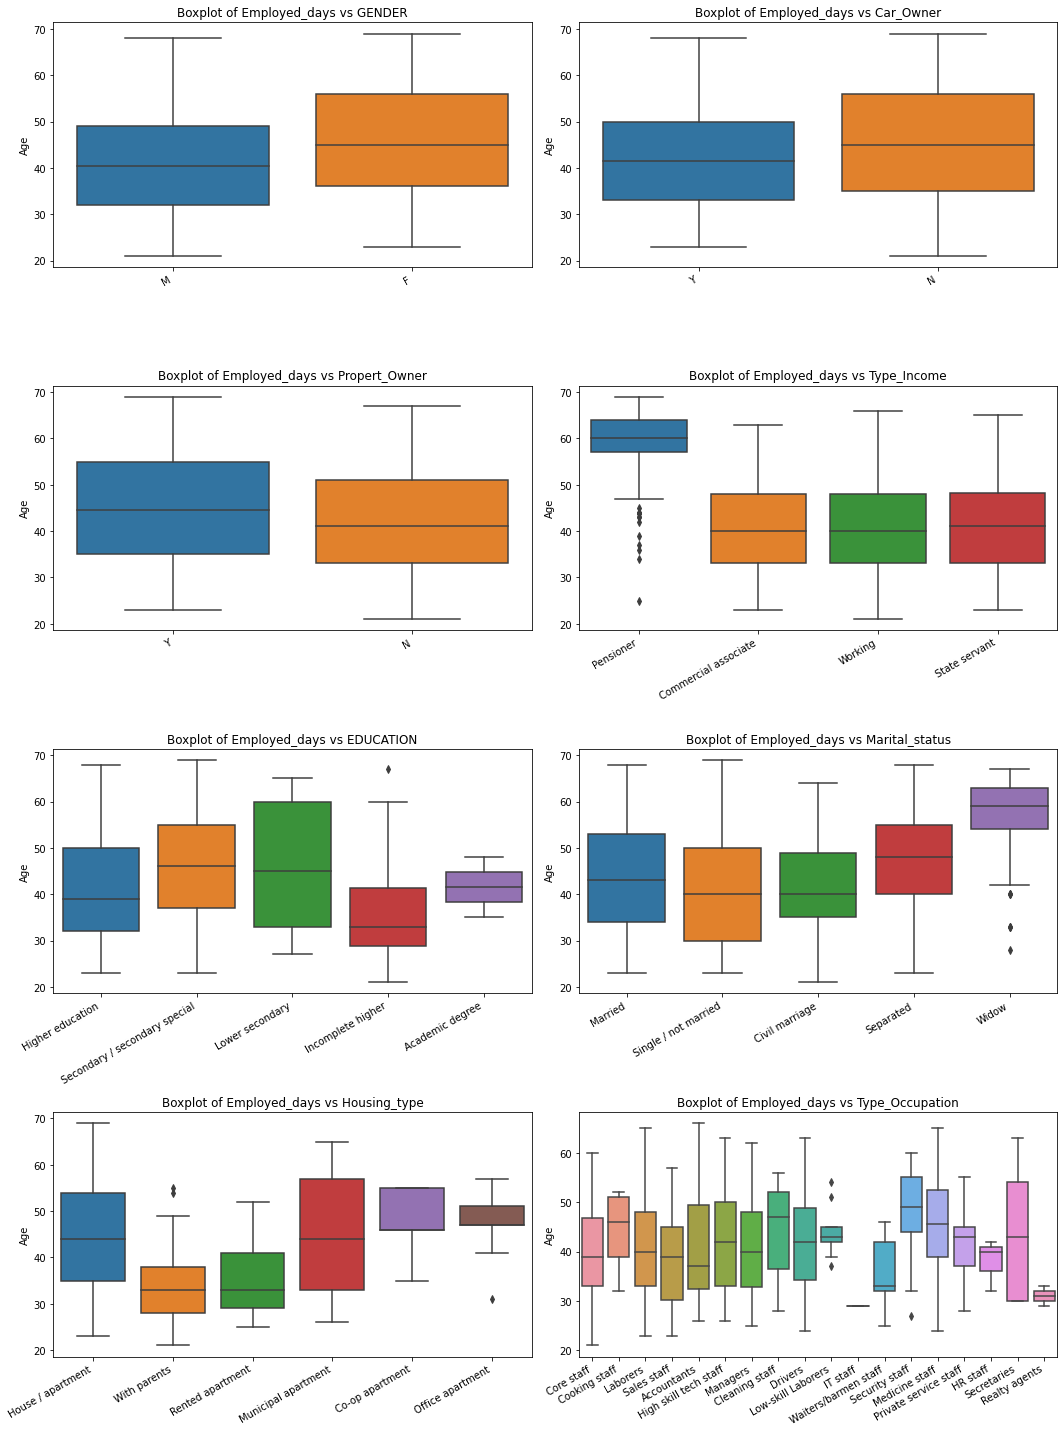

In [80]:
fig, axes = plt.subplots(4,2,figsize=(15,20))
cat_vars = ['GENDER', 'Car_Owner', 'Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation']

# Loop through each categorical variable and create a boxplot of Age vs that variable
for var, ax in zip(cat_vars, axes.flatten()):
    sns.boxplot(x=var, y='Age', data=credit_df, ax=ax)
    ax.set_title("Boxplot of Employed_days vs {}".format(var))
    ax.set_xlabel(None) # remove x-axis label
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", fontsize=10) # adjust x-axis tick label properties
    
plt.tight_layout()
plt.show()

Interpretation: 
    
    Female applicants are older than their male counterpart.
    Those without a car are usually older.
    Those who own a property tend to be older than those who don't.
    pensioners are older than those who are working (we can see that some have pensioned at a young age, those are outliers)
    We can see see that those who hold an academic degree are younger in general than the other groups.
    Widows tend to be much more elderly. We also see some outliers in their 30's as well.
    Unsurprisingly, those living with parent are generally younger. We also see some outliers as well.
    Lastly, those who work as Security staff tend to be older while those who work in Realty agents to be younger.

#### Employed_days vs the rest of categorical features

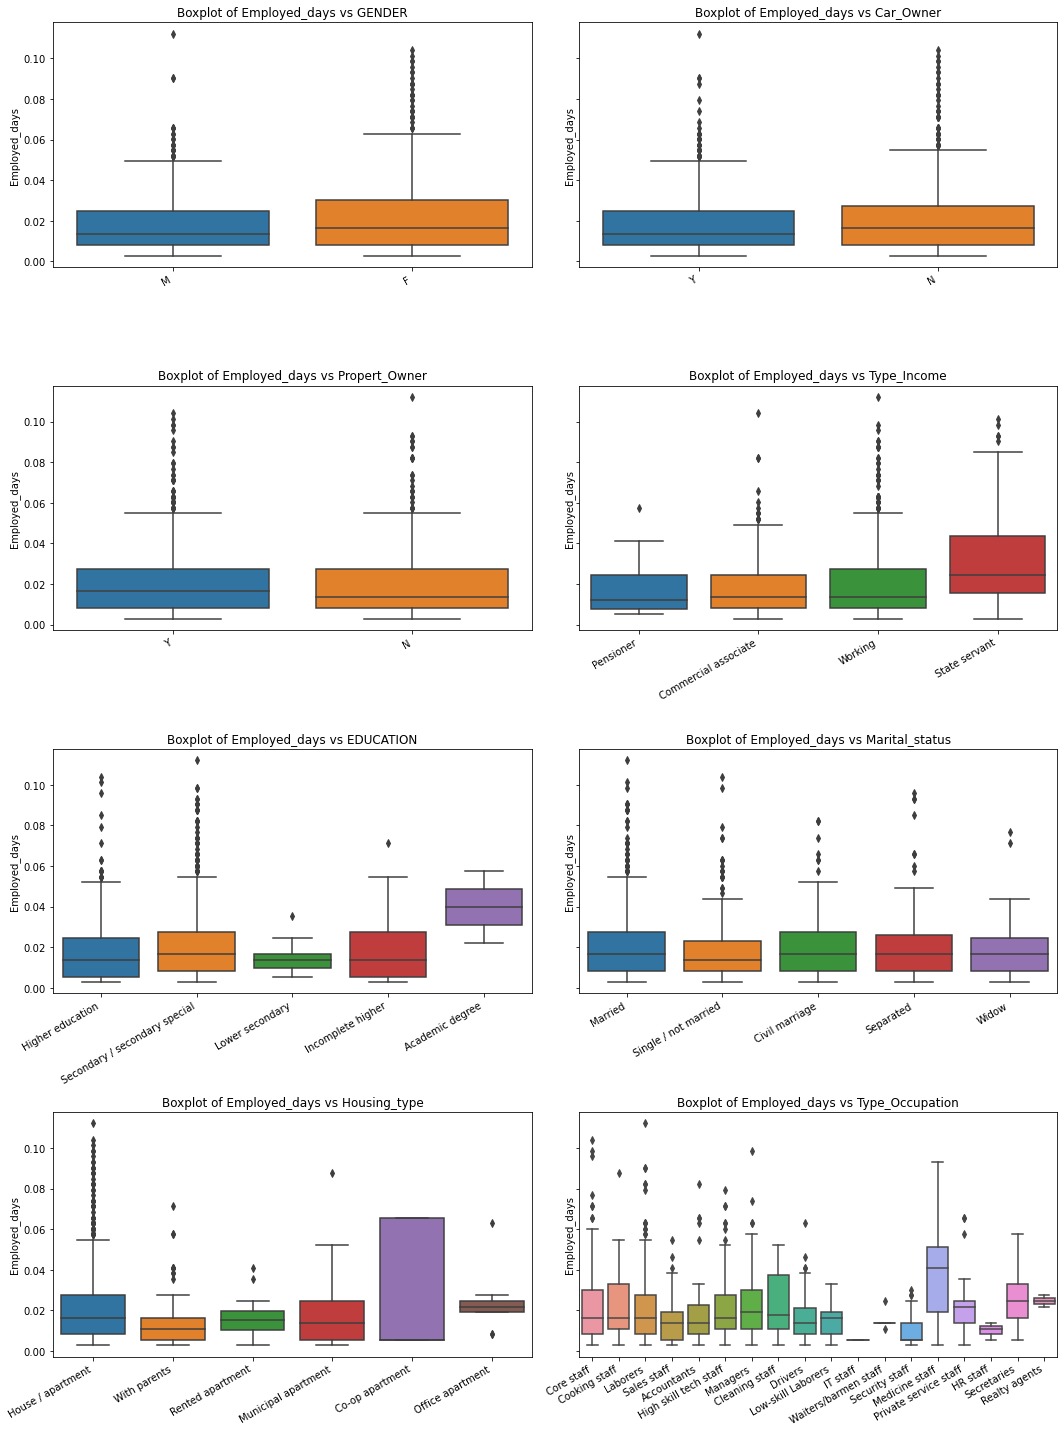

In [81]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharey=True)
cat_vars = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
employ_length = np.abs(credit_df[credit_df['Employed_days'] > 0]['Employed_days']) / 365.25

# Loop through each categorical variable and create a boxplot of Employed_days vs that variable
for var, ax in zip(cat_vars, axes.flatten()):
    sns.boxplot(x=var, y=employ_length, data=credit_df, ax=ax)
    ax.set_title("Boxplot of Employed_days vs {}".format(var))
    ax.set_xlabel(None) # remove x-axis label
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", fontsize=10) # adjust x-axis tick label properties

plt.tight_layout() # increase spacing between subplots
plt.show()

Interpretation:

     State employed applicant tend to have been employed longer than the rest.
     Those who work in the medical field, have been employed longer than the rest.

### Data Transformation

Age

    fix skewness

Family_Members

    Fix outliers

CHILDREN

    Fix outliers
    Drop feature

Income

    Remove outliers
    fix skewness

Employed days

    Remove outliers
    
Label

    Balance the data

In [82]:
data = pd.merge(credit_df, Clabel_df, on="Ind_ID")

In [83]:
credit=data.copy()

### Data Cleaning

In [84]:
credit.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                  0
Employed_days        0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [85]:
credit.dropna(inplace=True)

### Drop features

In [86]:
credit.drop(columns = ['CHILDREN'],inplace=True)

In [87]:
credit.drop('Ind_ID', axis=1, inplace=True)

### Outliers Handling

In [88]:
from sklearn.pipeline import Pipeline

In [89]:
class OutlierRemover:
    def __init__(self, feat_with_outliers=None):
        self.feat_with_outliers = feat_with_outliers
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_out = X.copy()
        for feat in self.feat_with_outliers:
            Q1 = np.percentile(X_out[feat], 25)
            Q3 = np.percentile(X_out[feat], 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            X_out = X_out[(X_out[feat] >= lower_bound) & (X_out[feat] <= upper_bound)]
        return X_out

In [90]:
# Create an instance of the OutlierRemover class
outlier_remover = OutlierRemover(feat_with_outliers=['Family_Members', 'Annual_income','Employed_days'])

# Create a scikit-learn pipeline with the OutlierRemover and any other transformers and/or estimators
pipeline = Pipeline([
    ('outlier_remover', outlier_remover),
    # Add any other transformers and/or estimators to the pipeline
])

# Fit and transform the pipeline on the DataFrame to remove outliers
cleaned_df = pipeline.fit_transform(credit)

In [91]:
cleaned_df

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
11,F,Y,Y,90000,Working,Secondary / secondary special,Married,House / apartment,52,3,1,1,0,Cooking staff,2,1
12,F,Y,Y,191399,Working,Secondary / secondary special,Married,House / apartment,52,3,1,1,0,Cooking staff,2,1
13,F,Y,Y,90000,Working,Secondary / secondary special,Married,House / apartment,52,3,1,1,0,Cooking staff,2,1
15,M,N,Y,270000,Working,Secondary / secondary special,Married,House / apartment,47,1,0,0,0,Laborers,2,1
16,M,N,Y,270000,Working,Secondary / secondary special,Single / not married,House / apartment,47,1,0,0,0,Laborers,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,M,Y,N,360000,State servant,Secondary / secondary special,Married,House / apartment,31,10,0,1,0,Drivers,3,0
1543,F,N,Y,191399,Commercial associate,Higher education,Married,House / apartment,33,6,0,0,0,Managers,2,0
1544,F,N,N,225000,Commercial associate,Incomplete higher,Single / not married,House / apartment,28,4,0,0,0,Accountants,1,0
1545,M,Y,Y,180000,Working,Higher education,Married,House / apartment,36,7,0,0,0,Managers,4,0


In [92]:
cleaned_df

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
11,F,Y,Y,90000,Working,Secondary / secondary special,Married,House / apartment,52,3,1,1,0,Cooking staff,2,1
12,F,Y,Y,191399,Working,Secondary / secondary special,Married,House / apartment,52,3,1,1,0,Cooking staff,2,1
13,F,Y,Y,90000,Working,Secondary / secondary special,Married,House / apartment,52,3,1,1,0,Cooking staff,2,1
15,M,N,Y,270000,Working,Secondary / secondary special,Married,House / apartment,47,1,0,0,0,Laborers,2,1
16,M,N,Y,270000,Working,Secondary / secondary special,Single / not married,House / apartment,47,1,0,0,0,Laborers,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,M,Y,N,360000,State servant,Secondary / secondary special,Married,House / apartment,31,10,0,1,0,Drivers,3,0
1543,F,N,Y,191399,Commercial associate,Higher education,Married,House / apartment,33,6,0,0,0,Managers,2,0
1544,F,N,N,225000,Commercial associate,Incomplete higher,Single / not married,House / apartment,28,4,0,0,0,Accountants,1,0
1545,M,Y,Y,180000,Working,Higher education,Married,House / apartment,36,7,0,0,0,Managers,4,0


### Skewness Handling

In [93]:
# Select the columns to transform
cols_to_transform = ['Age', 'Annual_income']

# Apply the cubic root transformation to the selected columns
cleaned_df[cols_to_transform] = np.cbrt(cleaned_df[cols_to_transform])

### One hot encoding 

In [94]:
# One-hot encode categorical columns
cleaned_df = pd.get_dummies(cleaned_df, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

In [95]:
credit=cleaned_df.copy()

In [96]:
credit

,Annual_income,Age,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label,GENDER_F,GENDER_M,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
11,44.814047,3.732511,3,1,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
12,57.629726,3.732511,3,1,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13,44.814047,3.732511,3,1,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
15,64.633041,3.608826,1,0,0,0,2,1,0,1,...,1,0,0,0,0,0,0,0,0,0
16,64.633041,3.608826,1,0,0,0,2,1,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,71.137866,3.141381,10,0,1,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1543,57.629726,3.207534,6,0,0,0,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1544,60.822020,3.036589,4,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1545,56.462162,3.301927,7,0,0,0,4,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [97]:
credit.head(20)

,Annual_income,Age,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label,GENDER_F,GENDER_M,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
11,44.814047,3.732511,3,1,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
12,57.629726,3.732511,3,1,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13,44.814047,3.732511,3,1,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
15,64.633041,3.608826,1,0,0,0,2,1,0,1,...,1,0,0,0,0,0,0,0,0,0
16,64.633041,3.608826,1,0,0,0,2,1,0,1,...,1,0,0,0,0,0,0,0,0,0
17,50.132979,3.732511,7,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
18,50.132979,3.732511,7,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
21,58.723015,3.207534,5,0,0,1,2,1,0,1,...,1,0,0,0,0,0,0,0,0,0
22,54.004115,3.659306,3,0,0,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
23,48.274469,3.239612,3,0,0,0,4,1,1,0,...,0,0,0,0,0,0,1,0,0,0


### Splitting the dataset into train and test sets


In [98]:
from sklearn.model_selection import train_test_split

X = credit.drop('label',axis=1)
y = credit['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=1)

### Dealing with imbalanced data

In [99]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_train_scaled = pd.DataFrame(MMS.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(MMS.transform(X_test), columns=X_test.columns)

We are oversampling with SMOTE because the minority class is very rare in the data.

In [100]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_train_oversam, y_train_oversam = oversample.fit_resample(X_train_scaled, y_train)
X_test_oversam, y_test_oversam = oversample.fit_resample(X_test_scaled, y_test)

In [101]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    89.946381
1    10.053619
Name: label, dtype: float64

In [102]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: label, dtype: float64

## Model Selection

### Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(X_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(X_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  65.2439024390244 %

Confusion matrix :
[[107  57]
 [ 57 107]]

Classification report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       164
           1       0.65      0.65      0.65       164

    accuracy                           0.65       328
   macro avg       0.65      0.65      0.65       328
weighted avg       0.65      0.65      0.65       328



### RandomForestClassifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(X_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(X_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(X_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  83.53658536585365 %

Confusion matrix :
[[156   8]
 [ 46 118]]

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       164
           1       0.94      0.72      0.81       164

    accuracy                           0.84       328
   macro avg       0.85      0.84      0.83       328
weighted avg       0.85      0.84      0.83       328



### XGBClassifier

In [105]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(X_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(X_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(X_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

XGBoost Model Accuracy :  90.2439024390244 %

Confusion matrix :
[[160   4]
 [ 28 136]]

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       164
           1       0.97      0.83      0.89       164

    accuracy                           0.90       328
   macro avg       0.91      0.90      0.90       328
weighted avg       0.91      0.90      0.90       328



### SVMClassifier

In [106]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train_oversam, y_train_oversam)

print('Support Vector Classifier Accuracy : ', svc_model.score(X_test_oversam, y_test_oversam)*100, '%')

prediction = svc_model.predict(X_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Support Vector Classifier Accuracy :  78.04878048780488 %

Confusion matrix :
[[149  15]
 [ 57 107]]

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       164
           1       0.88      0.65      0.75       164

    accuracy                           0.78       328
   macro avg       0.80      0.78      0.78       328
weighted avg       0.80      0.78      0.78       328



### MLPClassifier

In [107]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(verbose = 0 , max_iter = 46 , random_state = 0)

MLP_model.fit(X_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', MLP_model.score(X_test_oversam, y_test_oversam)*100, '%')

prediction = MLP_model.predict(X_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Decision Tree Model Accuracy :  71.95121951219512 %

Confusion matrix :
[[142  22]
 [ 70  94]]

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       164
           1       0.81      0.57      0.67       164

    accuracy                           0.72       328
   macro avg       0.74      0.72      0.71       328
weighted avg       0.74      0.72      0.71       328



C:\Users\91789\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (46) reached and the optimization hasn't converged yet.
  warnings.warn(


### DecisionTreeClassifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(X_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(X_test_oversam, y_test_oversam)*100, '%')

prediction = decision_model.predict(X_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Decision Tree Model Accuracy :  82.01219512195121 %

Confusion matrix :
[[139  25]
 [ 34 130]]

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       164
           1       0.84      0.79      0.82       164

    accuracy                           0.82       328
   macro avg       0.82      0.82      0.82       328
weighted avg       0.82      0.82      0.82       328



### KNeighborsClassifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(X_train_oversam, y_train_oversam)

print('KNN Model Accuracy : ', knn_model.score(X_test_oversam, y_test_oversam)*100, '%')

prediction = knn_model.predict(X_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

KNN Model Accuracy :  63.109756097560975 %

Confusion matrix :
[[ 97  67]
 [ 54 110]]

Classification report:
              precision    recall  f1-score   support

           0       0.64      0.59      0.62       164
           1       0.62      0.67      0.65       164

    accuracy                           0.63       328
   macro avg       0.63      0.63      0.63       328
weighted avg       0.63      0.63      0.63       328



As we have seen that, XGBoost Model is giving highest accuracy of 89.82 %, hence we will use XGBoost Model for predicion

### Model Interpretation

In [110]:
import shap

# create an explainer object
explainer = shap.TreeExplainer(XGB_model)

# generate SHAP values
shap_values = explainer.shap_values(X_test_oversam)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


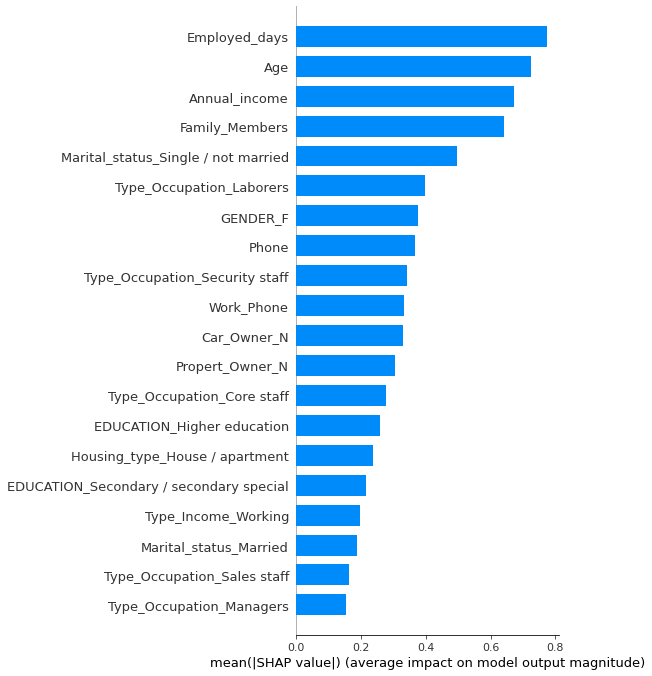

In [111]:
shap.summary_plot(shap_values, X_test_oversam, plot_type="bar")

In [112]:
newdata={'Annual_income' : 0.4795561479200171,
         'Age' : 0.16,
         'Employed_days' :0.1,
         'Work_Phone': 0,
         'Phone': 0,
         'EMAIL_ID': 0,
         'Family_Members': 0.67,
         'GENDER_F':0,
         'GENDER_M':1,
         'Car_Owner_N':1,
         'Car_Owner_Y':0,
         'Propert_Owner_N': 1,                            
         'Propert_Owner_Y': 0,                           
         'Type_Income_Commercial associate':0,         
         'Type_Income_Pensioner'  : 0,                   
         'Type_Income_State servant' :0,                 
         'Type_Income_Working'  :1,                      
'EDUCATION_Higher education' : 0,                
'EDUCATION_Incomplete higher' : 0,               
'EDUCATION_Lower secondary' : 0,                 
'EDUCATION_Secondary / secondary special' : 1,  
'Marital_status_Civil marriage' : 0,            
'Marital_status_Married' : 1,                  
'Marital_status_Separated' : 0,                  
'Marital_status_Single / not married' : 0,       
'Marital_status_Widow' :0,                   
'Housing_type_Co-op apartment' :  0,             
'Housing_type_House / apartment' :1,             
'Housing_type_Municipal apartment' :0,           
'Housing_type_Office apartment' : 0,             
'Housing_type_Rented apartment' : 0,             
'Housing_type_With parents' : 0,                 
'Type_Occupation_Accountants' : 0,               
'Type_Occupation_Cleaning staff' : 0,            
'Type_Occupation_Cooking staff' : 0,              
'Type_Occupation_Core staff' : 0,                
'Type_Occupation_Drivers' :0,                    
'Type_Occupation_HR staff' : 0,                  
'Type_Occupation_High skill tech staff' :0,      
'Type_Occupation_IT staff' :0,                   
'Type_Occupation_Laborers' : 1,                  
'Type_Occupation_Low-skill Laborers' :0,         
'Type_Occupation_Managers' :  0,                 
'Type_Occupation_Medicine staff' : 0,            
'Type_Occupation_Private service staff' :0,      
'Type_Occupation_Realty agents' : 0,             
'Type_Occupation_Sales staff' :0,                
'Type_Occupation_Secretaries' : 0,               
'Type_Occupation_Security staff' :0,             
'Type_Occupation_Waiters/barmen staff' :0}     

In [113]:
df_new = pd.DataFrame(newdata,index=[0])
df_new

,Annual_income,Age,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,0.479556,0.16,0.1,0,0,0,0.67,0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [114]:
new_pred = XGB_model.predict(df_new)
if new_pred == 1:
    print("The application is rejected")
else:
    print("The application is accepted")

The application is rejected
